<a href="https://colab.research.google.com/github/Anweshasen98/Network-Analysis-of-Global-Airline-Connectivity/blob/main/China.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CHINA

In [ ]:
import networkx as nx
from mpl_toolkits.basemap import Basemap as Basemap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#FLIGHT DATA FOR ALL COUNTRIES
flight_df = pd.read_excel("Flight Data.xlsx")

#Airport Data of All Countries
airport_df = pd.read_csv("Airports.csv",index_col=None, header=0, encoding='latin-1')


In [ ]:
edges_china=pd.read_excel("Flight_Data_China.xlsx")

edges_china.shape

(2602, 8)

In [ ]:
edges_china.isna().sum()

Unnamed: 0        0
Source            0
Source City       0
Source Country    0
Target            0
Target City       0
Target Country    0
Weight            0
dtype: int64

In [ ]:
edges_china = edges_china.groupby(['Source','Target']).sum('Weight').reset_index()

edges_china.shape

(1144, 4)

In [ ]:
Graph = nx.from_pandas_edgelist(
    df= edges_china ,
    source = 'Source',
    target = 'Target',
    edge_attr = 'Weight' ,
    create_using = nx.DiGraph())

In [ ]:
nodes_china=pd.read_excel('nodes_china.xlsx')

nodes_china.shape

(110, 6)

In [ ]:
nodes_china.isna().sum()

Unnamed: 0    0
id            0
label         0
country       0
Lat           0
Lon           0
dtype: int64

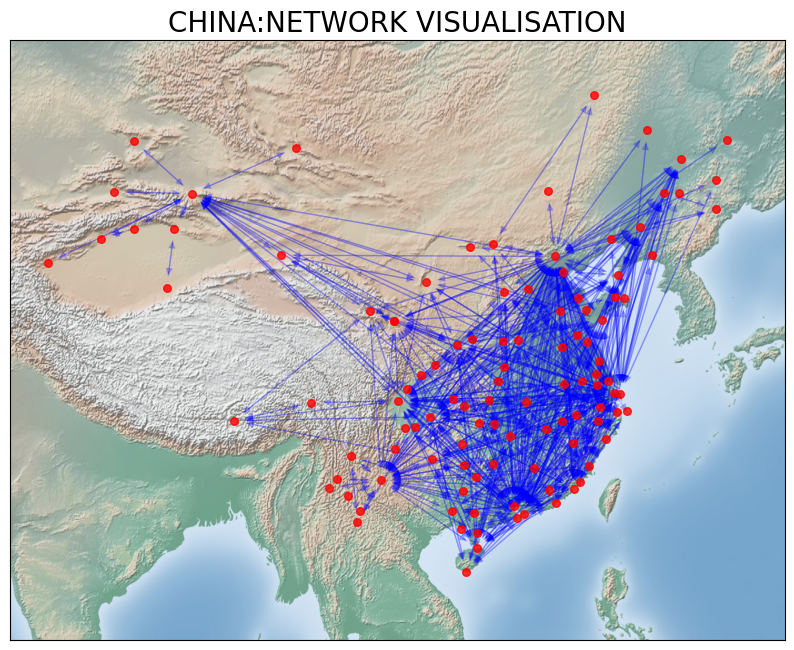

In [ ]:
# USING BASE-MAP LIBRARY TO DRAW THE NETWORK GRAPH USING LAT-LONG COORDINATES OF AIRPORTS

plt.figure(figsize = (10,9))
m = Basemap(
         projection='merc',
         llcrnrlon= 73,
         llcrnrlat= 13,
         urcrnrlon= 135,
         urcrnrlat= 52,
         lat_ts=0,
         resolution='c',
         suppress_ticks=True)

lon= nodes_china['Lon'].values

lat= nodes_china['Lat'].values


mx, my = m(lon, lat)
pos = {}

for count, elem in enumerate (nodes_china['id']):
    pos[elem] = (mx[count], my[count])



nx.draw_networkx_nodes(G = Graph,  pos = pos,
                        node_color = 'r', alpha = 0.8,
                      node_size = 30 )
nx.draw_networkx_edges(G = Graph, pos = pos, edge_color='b',
                        alpha=0.2, arrows = True)





m.shadedrelief()

plt.title('CHINA:NETWORK VISUALISATION', fontsize=20)

plt.savefig("C:/Users/parin/Desktop/DATA ANALYTICS ASSIGNMENT/UChina_Network.png", format = "png", dpi = 300)

plt.show()


In [ ]:
import networkx as nx
from mpl_toolkits.basemap import Basemap as Basemap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# IMPORTING FLIGHT DATA FOR ALL COUNTRIES
flight_df = pd.read_excel("Flight Data.xlsx")

#Airport Data of All Countries

airport_df = pd.read_csv("Airports.csv",index_col=None, header=0, encoding='latin-1')



In [ ]:
airport_china = airport_df[(airport_df['country'] == "China")]

airport_china_id = airport_china[airport_china['country'] == 'China']['id'].unique().tolist() #list


flight_china = flight_df[flight_df['Source'].isin(airport_china_id) & flight_df['Target'].isin(airport_china_id)]
flight_china = pd.DataFrame(flight_china.groupby(['Source','Target']).sum().reset_index())


In [ ]:
Graph = nx.from_pandas_edgelist(
    df= flight_china ,
    source = 'Source',
    target = 'Target',
    edge_attr = 'Weight' ,
    create_using = nx.DiGraph())


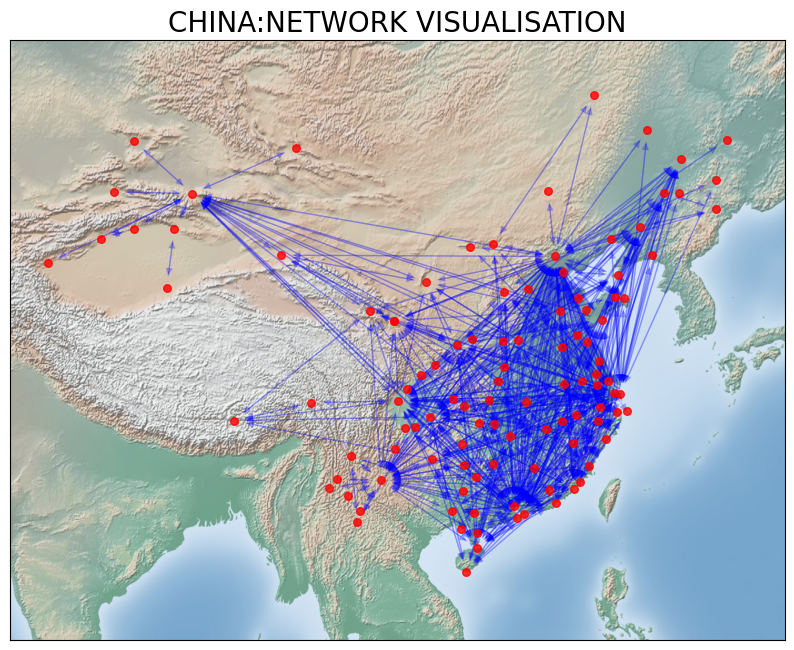

In [ ]:
# USING BASE-MAP LIBRARY TO DRAW THE NETWORK GRAPH USING LAT-LONG COORDINATES OF AIRPORTS

plt.figure(figsize = (10,9))
m = Basemap(
         projection='merc',
         llcrnrlon= 73,
         llcrnrlat= 13,
         urcrnrlon= 135,
         urcrnrlat= 52,
         lat_ts=0,
         resolution='c',
         suppress_ticks=True)

lon= airport_china['Lon'].values

lat= airport_china['Lat'].values


mx, my = m(lon, lat)
pos = {}

for count, elem in enumerate (airport_china['id']):
    pos[elem] = (mx[count], my[count])



nx.draw_networkx_nodes(G = Graph,  pos = pos,
                        node_color = 'r', alpha = 0.8,
                      node_size = 30 )
nx.draw_networkx_edges(G = Graph, pos = pos, edge_color='b',
                        alpha=0.2, arrows = True)





m.shadedrelief()

plt.title('CHINA:NETWORK VISUALISATION', fontsize=20)

#plt.savefig("C:/Users/parin/Desktop/DATA ANALYTICS ASSIGNMENT/UChina_Network.png", format = "png", dpi = 300)

plt.show()


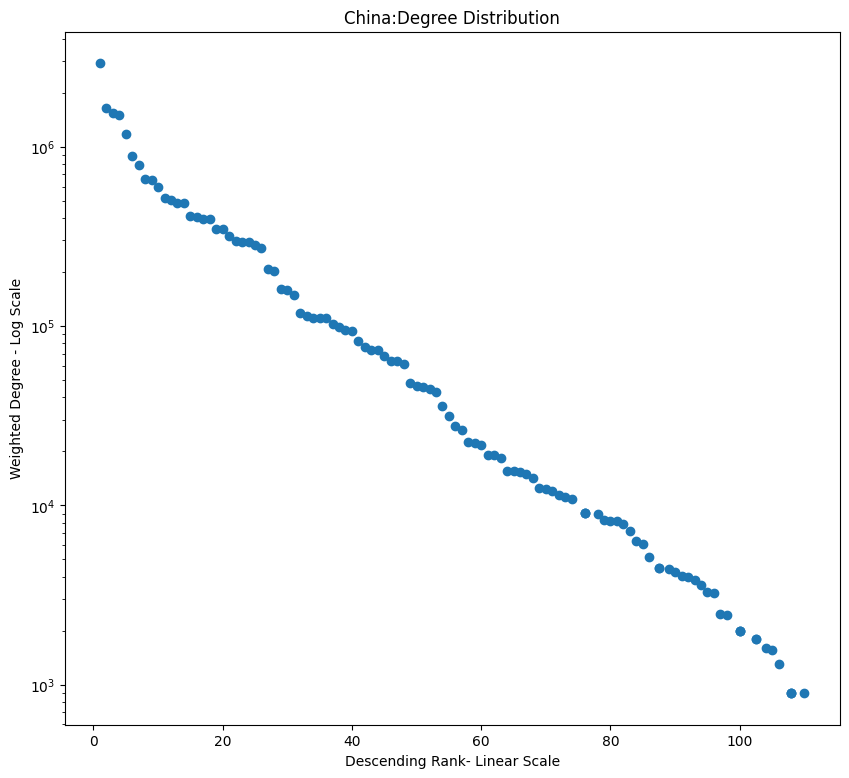

In [ ]:
#degrees in descending order ---convert to log scale and plot on y axis

degree_weighted =Graph.degree(weight="Weight")
degree_sorted_yaxis= sorted([ d for n,d in degree_weighted],reverse=True)


#dataframe with sorted degrees-ranked
degree_sorted_xaxis = pd.DataFrame(degree_sorted_yaxis).rank(ascending = False).values.tolist()

plt.figure(figsize = (10,9))

plt.xlabel('Descending Rank- Linear Scale')
plt.xscale("linear")

plt.ylabel('Weighted Degree - Log Scale')
plt.yscale("log")

plt.title('China:Degree Distribution')

plt.plot( degree_sorted_xaxis,degree_sorted_yaxis,'o', markersize=6)

plt.savefig("C:/Users/parin/Desktop/DATA ANALYTICS ASSIGNMENT/Degree_Distribution_China.png", format = "png", dpi = 300)

plt.show()



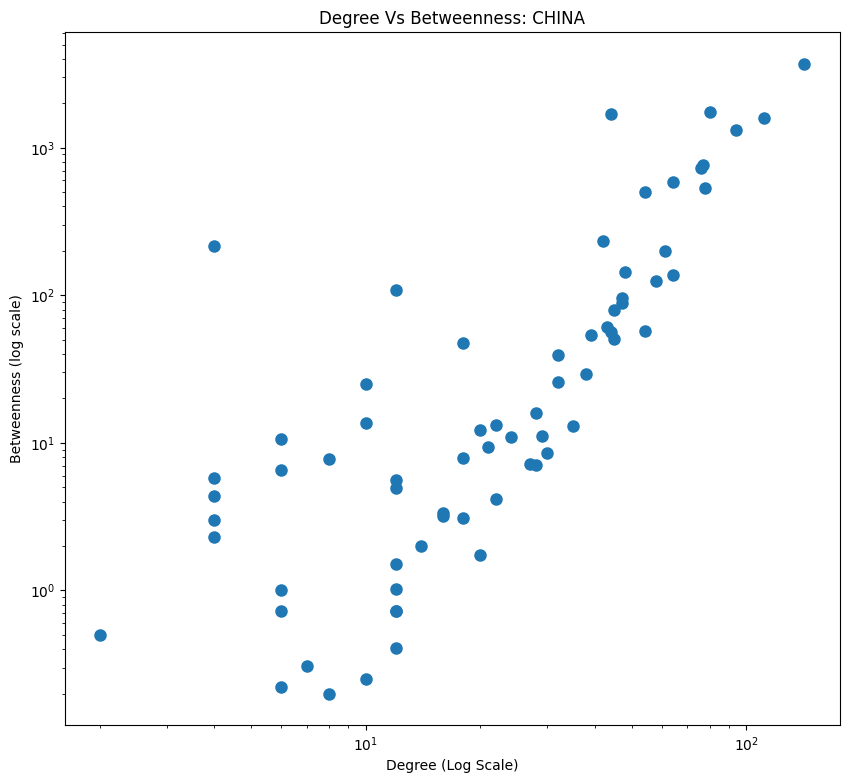

In [ ]:
deg_xaxis= [d for n, d in sorted(Graph.degree())]

bet = list(nx.betweenness_centrality(Graph,normalized= False).items())
bet_yaxis = [d for n,d in sorted(bet, reverse=False)]


plt.figure(figsize = (10,9))

plt.xlabel('Degree (Log Scale)')
plt.xscale("log")

plt.ylabel('Betweenness (log scale)')
plt.yscale("log")

plt.title('Degree Vs Betweenness: CHINA')
plt.plot(deg_xaxis, bet_yaxis,'o', markersize= 8)

plt.savefig("C:/Users/parin/Desktop/DATA ANALYTICS ASSIGNMENT/Betweenness_Distribution_China.png", format = "png", dpi = 300)

plt.show()


In [ ]:
# ASSORTATIIVITY (DEG PEARSON CORR COEFF)


nx.degree_pearson_correlation_coefficient(Graph)


-0.3962066286119526

In [ ]:
nx.degree_assortativity_coefficient(Graph)

-0.39620662861195355

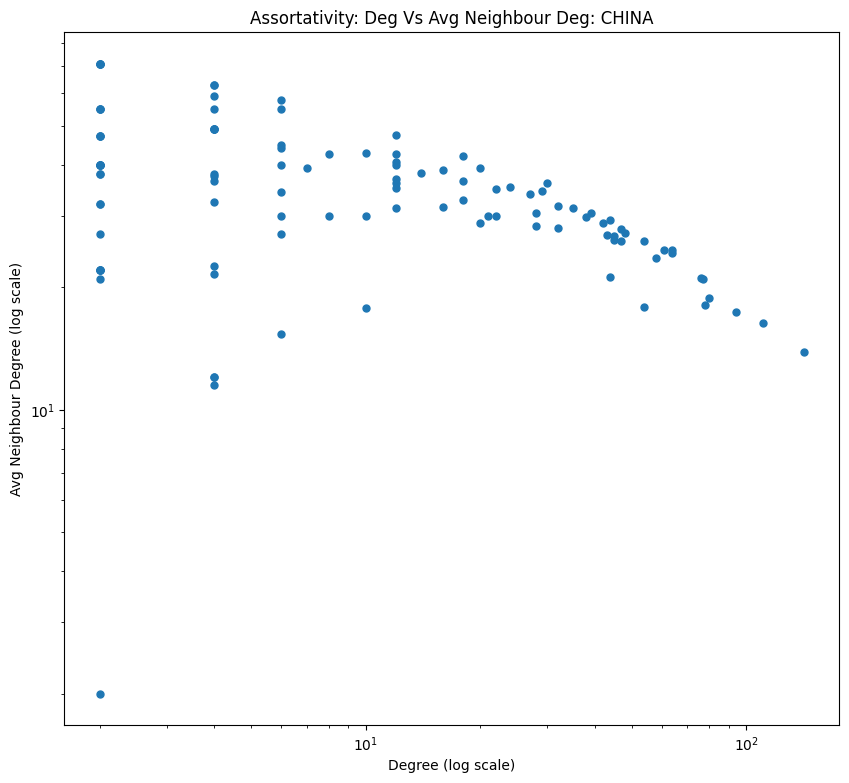

In [ ]:
# ASSORTATIIVITY  (DEG VS AVG NEIGHBOURS DEG)

deg_xaxis= [d for n, d in sorted(Graph.degree())]


avg_ngbr_deg = list(nx.average_neighbor_degree(Graph).items())
avg_ngbr_axis = [d for n,d in sorted(avg_ngbr_deg,reverse=False)]

plt.figure(figsize = (10,9))

plt.xlabel('Degree (log scale)')
plt.xscale("log")

plt.ylabel('Avg Neighbour Degree (log scale)')
plt.yscale("log")

plt.title('Assortativity: Deg Vs Avg Neighbour Deg: CHINA')
plt.plot(deg_xaxis,avg_ngbr_axis, 'o',  markersize=5)

plt.savefig("C:/Users/parin/Desktop/DATA ANALYTICS ASSIGNMENT/Assortativity_China.png", format = "png", dpi = 300)

plt.show()

In [ ]:
# CORE COMMUNITY SIZE

core_community = nx.k_core(Graph)
Core_community_size = len(core_community)
Core_community_size

25

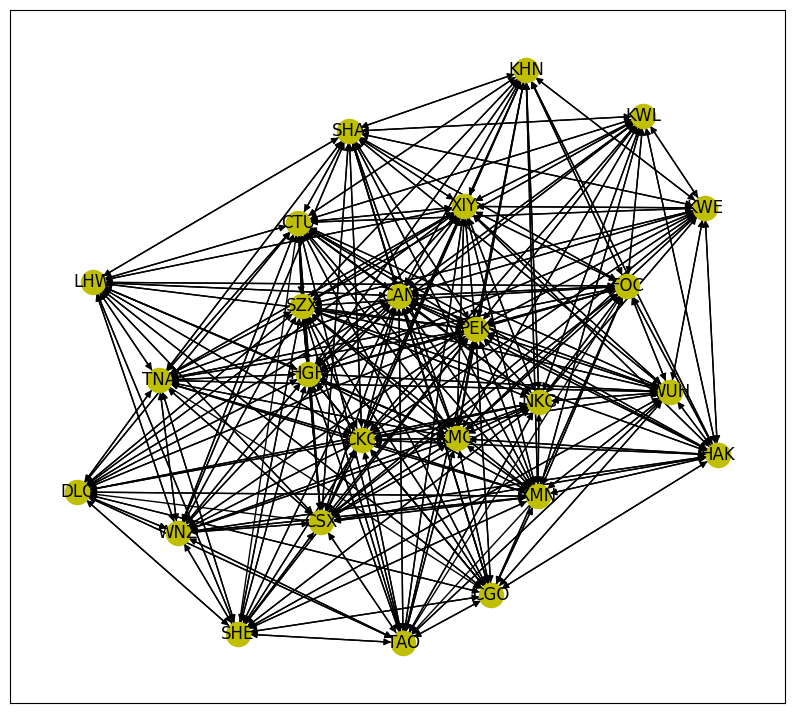

In [ ]:
# CORE COMMUNITY PLOT
plt.figure(figsize = (10,9))
nx.draw_networkx(core_community, node_color="y")

plt.savefig("C:/Users/parin/Desktop/DATA ANALYTICS ASSIGNMENT/Core Community_China.png", format = "png", dpi = 300)

plt.show()

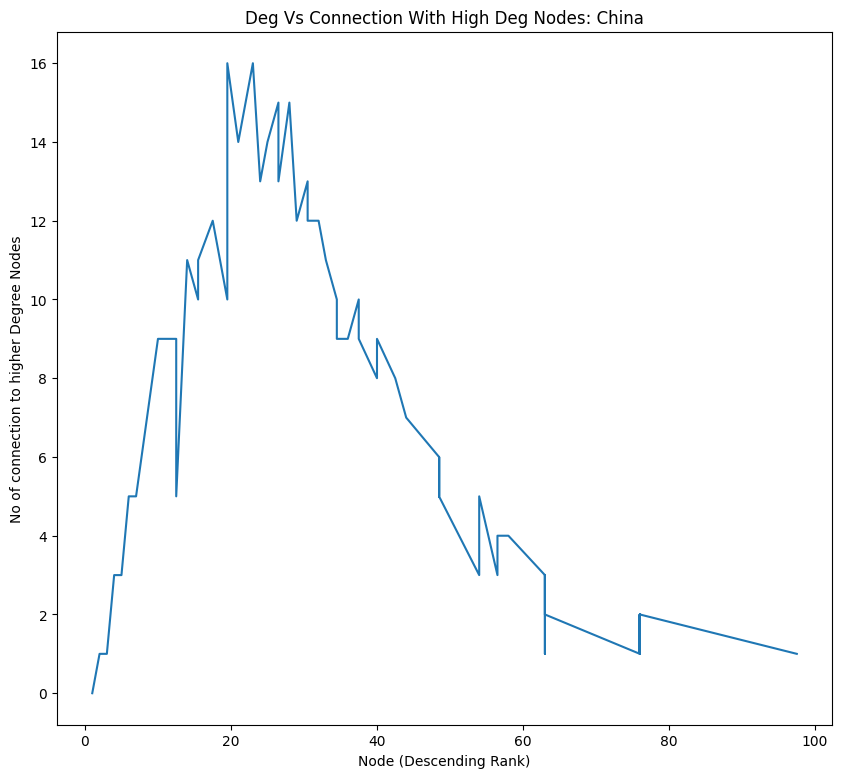

In [ ]:
# NODE-DEG VS CONNECTIONN WITH HIGHER DEG NODES PLOT

nodes_deg = pd.DataFrame([(n,d) for (n,d) in sorted(Graph.degree, key=lambda x: x[1], reverse=True)])
nodes_deg = nodes_deg.rename({0:'node',1:'degree'},axis = 1)
nodes_deg['rank'] = nodes_deg['degree'].rank(ascending=False)

hi_deg_ngbrs_list= []

for node in nodes_deg['node'] :

    hi_deg_ngbrs = 0

    for n in Graph.neighbors(node):

        if nodes_deg[nodes_deg['node'] == n].iloc[0]['degree'] > nodes_deg[nodes_deg['node'] == node].iloc[0]['degree'] :

            hi_deg_ngbrs = hi_deg_ngbrs +1

    hi_deg_ngbrs_list.append( hi_deg_ngbrs)




deg = sorted([d for n, d in Graph.degree], reverse=True)
deg_rank_axis = pd.DataFrame(deg).rank(ascending = False).values.tolist()

hi_deg_ngbrs_axis = hi_deg_ngbrs_list

plt.figure(figsize = (10,9))
plt.plot(deg_rank_axis,hi_deg_ngbrs_axis)
plt.title('Deg Vs Connection With High Deg Nodes: China')
plt.xlabel('Node (Descending Rank)')
plt.ylabel('No of connection to higher Degree Nodes')
plt.xscale("linear")
plt.yscale("linear")

plt.savefig('DegVsHighDegConnections_China.png')
